# Anomalies in the dataset can be detected by using isolation trees, dbscan and local outlier factor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
%matplotlib inline

In [12]:
X,y = make_circles(n_samples=800, factor=0.2, noise=0.1)

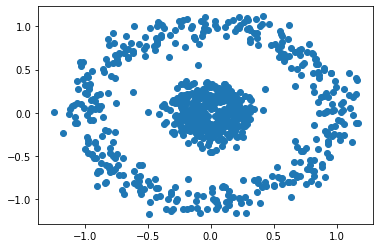

In [13]:
plt.scatter(X[:,0],X[:,1])

In [17]:
X[:5]

array([[ 0.01103658,  0.16047153],
       [ 0.25580129,  0.02040211],
       [ 1.05951534,  0.27374664],
       [ 0.30347877, -0.07181499],
       [ 0.01865476, -0.27863907]])

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.cluster import DBSCAN

In [26]:
dn = DBSCAN(eps=0.3,min_samples=5)
dn.fit_predict(X_scaled)

array([ 0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,  1,  1,
        1,  1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,
        1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0,
        1,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,
        0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,  0,
        0,  1,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1,  0,  1,
        1,  0,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,
        0,  0,  0,  1,  1

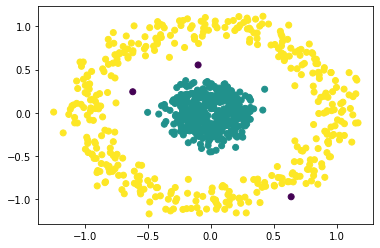

In [28]:
plt.scatter(X[:,0],X[:,1],c=dn.labels_)

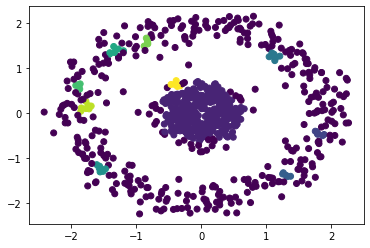

In [31]:
dn = DBSCAN(eps=0.1,min_samples=5)
dn.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=dn.labels_)

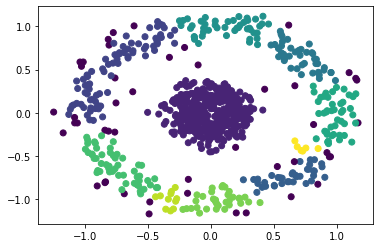

In [32]:
dn = DBSCAN(eps=0.1,min_samples=5)
dn.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=dn.labels_)

In [52]:
np.unique(dn.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64),
 array([ 47, 397,  80,  38,  43,  46,  46,  53,  33,  11,   6], dtype=int64))

## From the outcome above, we can see that the outliers are detected by the dbscan and are in the different color.

# Local outlier factor

In [47]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=3)

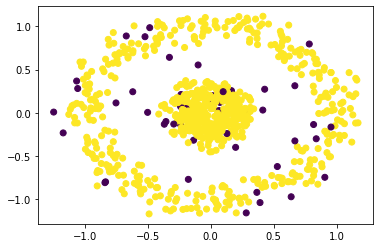

In [48]:
labels = lof.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels)

In [51]:
np.unique(labels, return_counts=True)

(array([-1,  1]), array([ 47, 753], dtype=int64))

# LOF has located the outliers

## For both the algorithms, -1 represents the outlier and the count of it is 47 in both the case which depends on e value for DBSCAN and n_neighbors for LOF.